In [6]:
import pandas as pd
import requests 

In [36]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1801952.0,1809149.0,1807607.0,1854148.0,1886648.0,1929836.0,1930988.0,1933158.0,1930626,1945292
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,385999.0,...,699982.0,700585.0,703470.0,707311.0,713125.0,716581.0,721111.0,726361.0,730556,733873
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1380352.0,...,2524971.0,2554324.0,2568375.0,2605056.0,2642843.0,2685299.0,2686654.0,2684854.0,2676806,2683281
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,224049.0,...,373436.0,380385.0,389122.0,399847.0,410716.0,419821.0,427763.0,434829.0,440555,446634
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,505083.0,...,941275.0,939888.0,942903.0,946621.0,953340.0,957691.0,962573.0,970202.0,975939,981583


In [15]:
df.RegionID.nunique()

30441

In [28]:
nj = df[df.State == 'NJ']

In [37]:
melted = pd.melt(df, id_vars=['RegionID','RegionName','RegionType','StateName','SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
df = melted[['RegionName','time','value']].rename(columns={'RegionName':'zip','value':'median_price'}).set_index('time')
mean_price = df[['median_price']].groupby('time').median_price.mean().reset_index().rename(columns={'median_price':'mean_price'}).set_index('time')
mean_price

,mean_price
time,
2000-01-31,152808.128938
2000-02-29,153270.343250
2000-03-31,153748.579815
2000-04-30,154866.091752
2000-05-31,156132.848980
...,...
2021-09-30,290770.535715
2021-10-31,293872.377580
2021-11-30,296737.552197


<AxesSubplot:xlabel='time'>

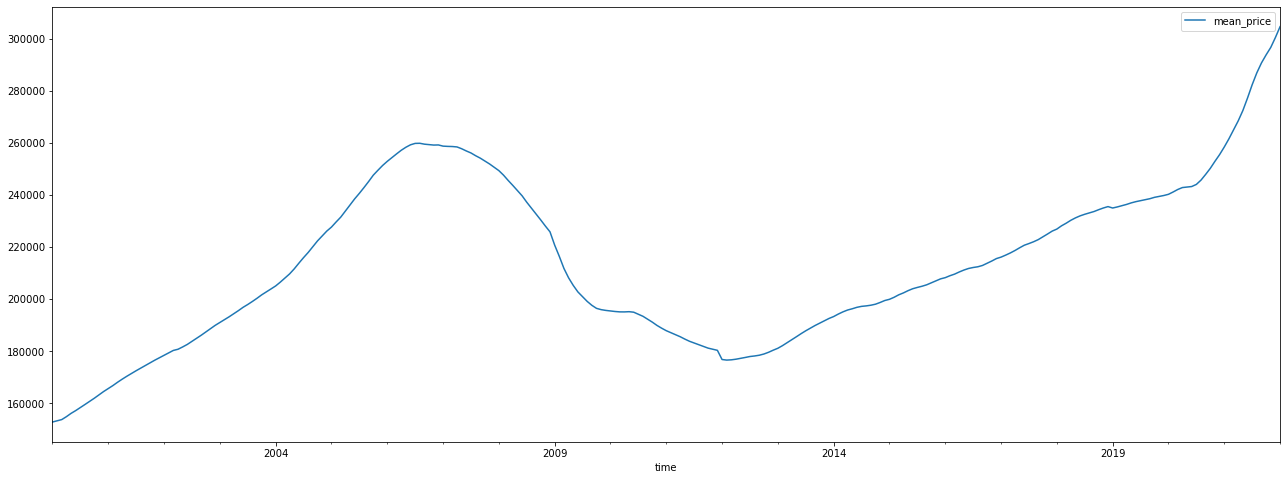

In [38]:
mean_price.plot(figsize=(22,8))

In [27]:
df[df.RegionName == 7058]['7/31/2017']

13281    589740.0
Name: 7/31/2017, dtype: float64

In [12]:
username = 'cRfvGEfwLyRNGDaXazTR'
secret = 'GGclHfoHGXYOQTUrj5ImRqJoBmIGBcURfSK3gOW4'
access_token = '1a5f98e1da5600951512a91ff9284000'

url = 'https://api.bridgedataoutput.com/api/v2/zgecon/type?access_token={{access_token}}&metadataType=metricType&limit=100'

r = requests.get(url, )
r.status_code

403

In [13]:
r.text

'{"success":false,"status":403,"bundle":{"name":"AuthenticationError","message":"Invalid access_token format"}}'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    95 non-null     int64  
 1   SizeRank    95 non-null     int64  
 2   RegionName  95 non-null     object 
 3   RegionType  95 non-null     object 
 4   StateName   94 non-null     object 
 5   2018-01-31  94 non-null     float64
 6   2018-02-28  94 non-null     float64
 7   2018-03-31  94 non-null     float64
 8   2018-04-30  94 non-null     float64
 9   2018-05-31  94 non-null     float64
 10  2018-06-30  94 non-null     float64
 11  2018-07-31  94 non-null     float64
 12  2018-08-31  94 non-null     float64
 13  2018-09-30  95 non-null     float64
 14  2018-10-31  95 non-null     float64
 15  2018-11-30  95 non-null     float64
 16  2018-12-31  95 non-null     float64
 17  2019-01-31  95 non-null     float64
 18  2019-02-28  95 non-null     float64
 19  2019-03-31  95 non-null     flo